In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import plotly.express as px

In [21]:

# Load the dataset
df = pd.read_csv("Life_Expectancy_Data.csv")
print("First 5 Rows:")
df.head(5)

First 5 Rows:


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,...,6,8.16,65,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,...,58,8.18,62,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,...,62,8.13,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,...,67,8.52,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,...,68,7.87,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [22]:
# print Information about the dataset

print("Information about the dataset:\n")
print(df.info())

Information about the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          1649 non-null   object 
 1   Year                             1649 non-null   int64  
 2   Status                           1649 non-null   object 
 3   Life expectancy                  1649 non-null   float64
 4   Adult Mortality                  1649 non-null   int64  
 5   infant deaths                    1649 non-null   int64  
 6   Alcohol                          1649 non-null   float64
 7   percentage expenditure           1649 non-null   float64
 8   Hepatitis B                      1649 non-null   int64  
 9   Measles                          1649 non-null   int64  
 10   BMI                             1649 non-null   float64
 11  under-five deaths                1649 non-null   i

In [23]:
# Print the Columns and rows present in the dataset
print("Number of Rows and Columns:",df.shape)

Number of Rows and Columns: (1649, 22)


In [24]:
# The datatypes of each column
print("Datatypes of each column:\n")
print(df.dtypes)

Datatypes of each column:

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                      int64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                          int64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                                int64
Total expenditure                  float64
Diphtheria                           int64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


In [29]:
# Check total missing values
print("Total missing values per column:\n")
missing_data = df.isnull().sum()
print(missing_data)



Total missing values per column:

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [30]:
# Check percentage of missing values
print("\nPercentage of missing values:\n")
missing_data_percent = (missing_data / len(df)) * 100
print(missing_data_percent)

# Only plot if there are missing values
if missing_data_percent.sum() > 0:
    plt.figure(figsize=(12,6))
    missing_data_percent.plot(kind='bar')
    plt.title('Percentage of Missing Values by Feature')
    plt.ylabel('Percentage Missing')
    plt.xlabel('Features')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No missing values detected — nothing to plot.")



Percentage of missing values:

Country                            0.0
Year                               0.0
Status                             0.0
Life expectancy                    0.0
Adult Mortality                    0.0
infant deaths                      0.0
Alcohol                            0.0
percentage expenditure             0.0
Hepatitis B                        0.0
Measles                            0.0
 BMI                               0.0
under-five deaths                  0.0
Polio                              0.0
Total expenditure                  0.0
Diphtheria                         0.0
 HIV/AIDS                          0.0
GDP                                0.0
Population                         0.0
 thinness  1-19 years              0.0
 thinness 5-9 years                0.0
Income composition of resources    0.0
Schooling                          0.0
dtype: float64

✅ No missing values detected — nothing to plot.


In [ ]:
# Check for non-standard missing indicators
print("Non-standard missing values:\n")
print(df.apply(lambda x: x.astype(str).str.lower().isin(['nan', 'na', '', '?', '-']).sum()))




Non-standard missing values:

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


In [ ]:
# **Observation:**  
# Upon thorough inspection using `df.isnull().sum()` and additional checks for non-standard missing indicators such as "NaN", "", and "?", we found **no missing values** in the dataset.

# **Conclusion:**  
# As a result, no imputation or removal methods were required. However, had missing values been found, we would have applied the following strategy:

# - **For Numerical Columns:** Use mean or median imputation, depending on distribution.
# - **For Categorical Columns:** Use mode imputation.
# - **For Highly Sparse Columns:** Consider dropping them if more than 30% of the data were missing.

# This confirms the dataset is ready for analysis without any imputation needed.


In [31]:
# Create binary developed flag
df['Developed'] = df['Status'].apply(lambda x: 1 if x == 'Developed' else 0)

# Calculate GDP per capita
df['GDP_per_capita'] = df['GDP'] / df['Population']

# Create decade bins
df['Decade'] = pd.cut(df['Year'], bins=[1999,2005,2010,2015], labels=['2000-2005','2006-2010','2011-2015'])

# Health expenditure per capita
df['Health_expenditure_per_capita'] = df['percentage expenditure'] / df['Population']

# Drop original columns we've transformed
df = df.drop(['Status', 'GDP', 'percentage expenditure'], axis=1)

# Display new features
print(df[['Developed', 'GDP_per_capita', 'Decade', 'Health_expenditure_per_capita']].head())

   Developed  GDP_per_capita     Decade  Health_expenditure_per_capita
0          0        0.000017  2011-2015                       0.000002
1          0        0.001870  2011-2015                       0.000224
2          0        0.000020  2011-2015                       0.000002
3          0        0.000181  2011-2015                       0.000021
4          0        0.000021  2011-2015                       0.000002


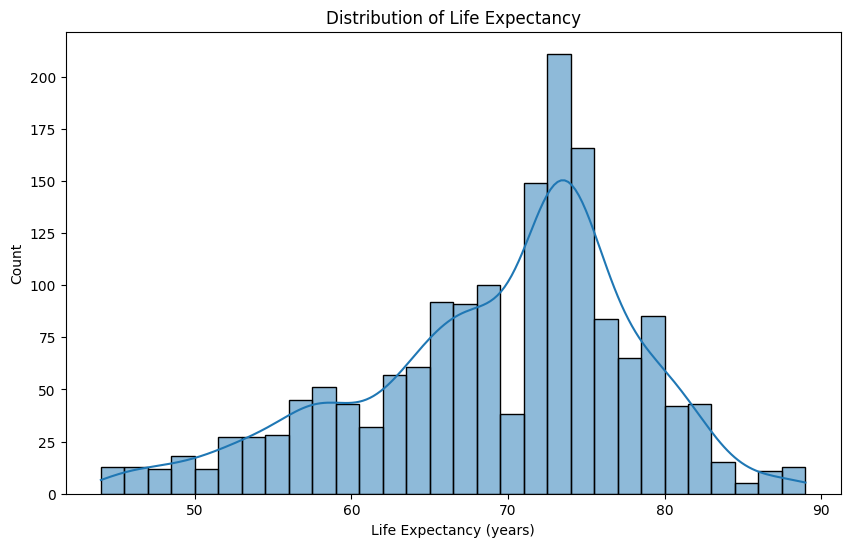

In [ ]:
# Visualization of Life Expectancy Distribution
plt.figure(figsize=(10,6))
sns.histplot(df['Life expectancy '], kde=True, bins=30)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy (years)')
plt.show()

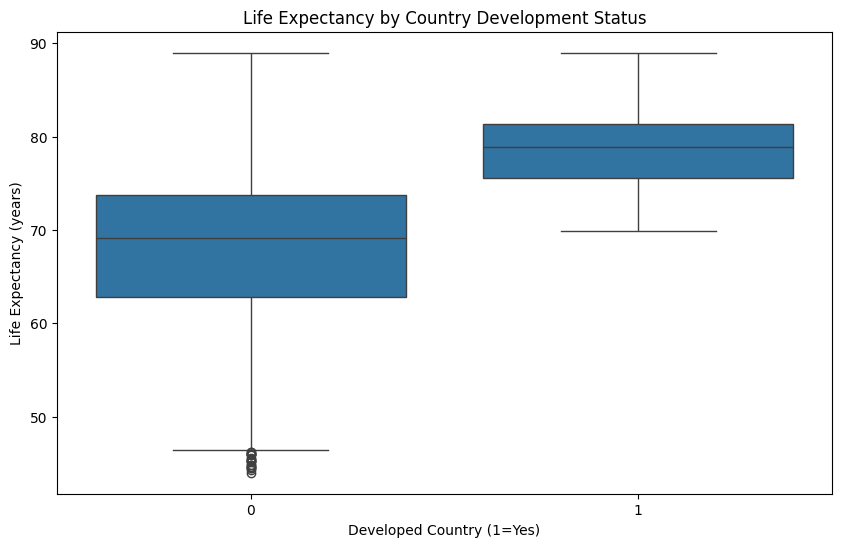

In [ ]:
# Visualization of Life Expectancy by Status
plt.figure(figsize=(10,6))
sns.boxplot(x='Developed', y='Life expectancy ', data=df)
plt.title('Life Expectancy by Country Development Status')
plt.xlabel('Developed Country (1=Yes)')
plt.ylabel('Life Expectancy (years)')
plt.show()

In [37]:

# # Visualization 3: Correlation Heatmap
# plt.figure(figsize=(15,10))
# corr = df.corr()
# sns.heatmap(corr, annot=True, fmt='.1f', cmap='coolwarm', 
#             annot_kws={'size':8}, vmin=-1, vmax=1)
# plt.title('Correlation Heatmap')
# plt.show()

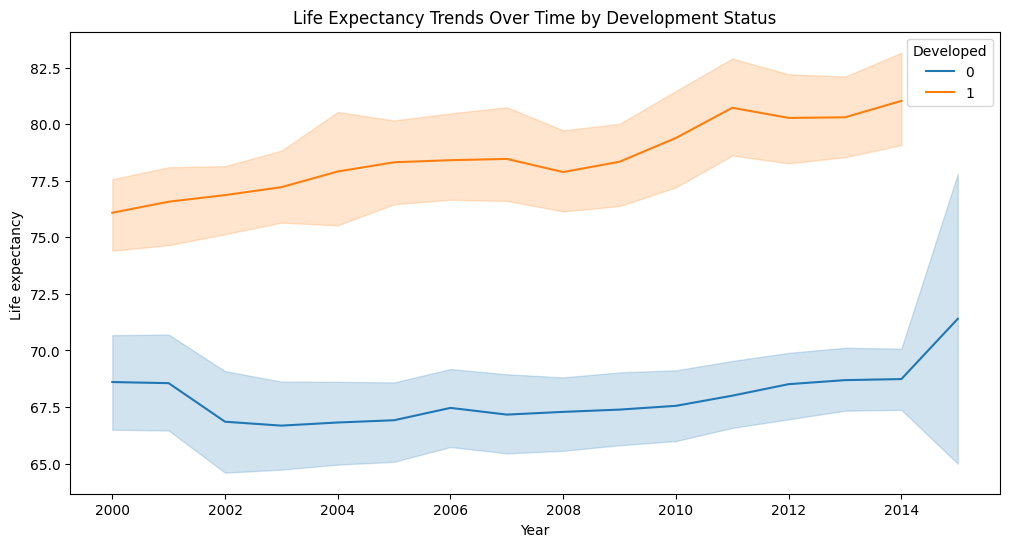

In [ ]:
# Visualization of Life Expectancy Trends Over Time
plt.figure(figsize=(12,6))
sns.lineplot(x='Year', y='Life expectancy ', hue='Developed', data=df)
plt.title('Life Expectancy Trends Over Time by Development Status')
plt.show()

In [ ]:
# Visualization of Interactive 3D Plot (using Plotly)
plt.figure(figsize=(12,6))
fig = px.scatter_3d(df, x='GDP_per_capita', y='Schooling', z='Life expectancy ',
                    color='Developed', hover_name='Country',
                    title='Life Expectancy by GDP and Schooling')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed